<a href="https://colab.research.google.com/github/mhieu2001/Uber-Analysis/blob/main/Uber_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1: LOADING THE DATA SET AND CHECK

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import calendar 

import os 

In [ ]:
from google.colab import files 
uploaded = files.upload () 
df=pd.read_csv("My Uber Drives.csv")

In [ ]:
df.head()
df.tail


In [7]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

2: CLEANNING THE DATASET

In [8]:
#Null check
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [11]:
df[df['END_DATE*'].isna()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [13]:
df.drop(df[df['END_DATE*'].isna()].index,axis=0,inplace=True)

In [14]:
df.isna().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 104.5+ KB


As the data is missing over half in the purpose, this column/data is invalid to analyze. 

In [17]:
df.drop(['PURPOSE*'],axis = 1,inplace = True)
df.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5


In [20]:
#Duplicate Check 
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


In [23]:
df.drop(df[df.duplicated()].index,axis=0,inplace=True)
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*


In [34]:
#The Data data need to convert into the data type instead of object. 
df['START_DATE*']=pd.to_datetime(df['START_DATE*'])
df['END_DATE*']=pd.to_datetime(df['END_DATE*'])
#format='%m/%d/%Y %H/%M'

In [37]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
dtype: object

Now we've done with the cleaning, the first analysis should start with type of this data is **Explotary Data Analysis(EDA)**

In [40]:
#1. Catagory 
df['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

In [41]:
#As we seen, there are two type of using Uber, for Business and Personal purposes. Let do some tricks here and compare. Here is the total miles of those
df[['CATEGORY*','MILES*']].groupby(['CATEGORY*']).agg(tot_miles=('MILES*','sum'))

,tot_miles
CATEGORY*,
Business,11477.1
Personal,717.7


Text(0.5, 1.0, 'Total Distance by each Category')

<Figure size 432x288 with 0 Axes>

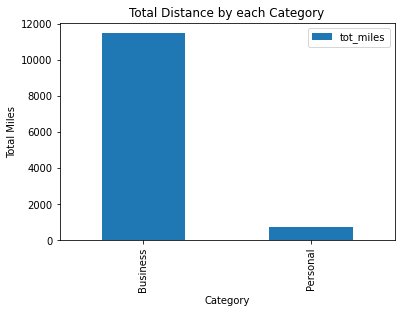

In [45]:
plt.figure()
df[['CATEGORY*','MILES*']].groupby(['CATEGORY*']).agg(tot_miles=('MILES*','sum')).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Miles')
plt.title('Total Distance by each Category')

In [82]:
def percentage(x):
    return x / x.sum()
df[['CATEGORY*','MILES*']].groupby(['CATEGORY*']).sum().apply(percentage)
# Business purpose take over 95% of travel

,MILES*
CATEGORY*,
Business,0.941147
Personal,0.058853


**STARTING POINTS**

In [85]:
#177 Unique points. 
len(df['START*'].unique())

177

In [86]:
df['START*'].value_counts(ascending=False)[:10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START*, dtype: int64

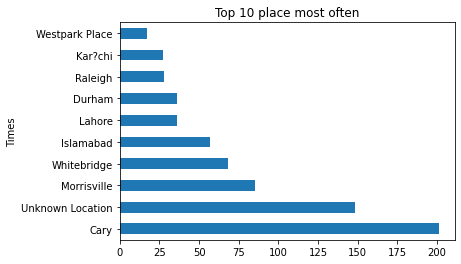

In [89]:
df['START*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Places',xlabel='Times',title='Top 10 place most often pick')

**ENDING POINTS**
We do the same process as the Starting. 

In [90]:
#188 Unique point
len(df['STOP*'].unique())

188

In [91]:
df['STOP*'].value_counts(ascending=False)[:10]

Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP*, dtype: int64

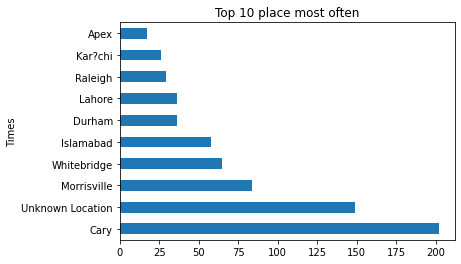

In [92]:
df['STOP*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Places',xlabel='Times',title='Top 10 place most often drop')

As we can see, the  Cary is the most often pick/drop, this has possible that around this user's home. 

In [98]:
df[df['START*']=='Unknown Location']['START*'].value_counts()



Unknown Location    148
Name: START*, dtype: int64

In [99]:
df[df['STOP*']=='Unknown Location']['STOP*'].value_counts()

Unknown Location    149
Name: STOP*, dtype: int64

**DISTANCE ANALYSIS**

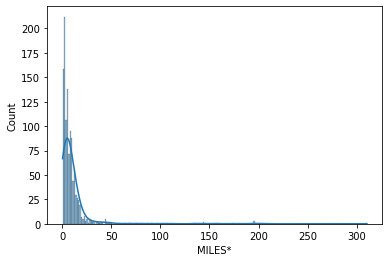

In [100]:
#Righly Skewed Histogram
sns.histplot(df['MILES*'],kde=True)

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES*,1154.0,10.567418,21.588452,0.5,2.9,6.0,10.4,310.3


We done with simple and single variable analysis. 
Next, **Multivariate Analysis **

In [ ]:
df.groupby(['START*','STOP*'])['MILES*'].apply(print)


In [107]:
#The most far trip is Morriville to Cary and Cary to Durham
df.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False)[1:11]

START*            STOP*           
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES*, dtype: float64

**Round-Trip Check **

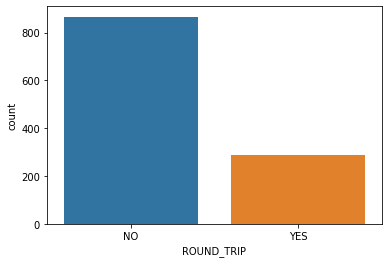

In [110]:
def is_roundtrip(df):
  if df['START*']!=df['STOP*']:
    return 'NO'
  else:
    return 'YES'
df['ROUND_TRIP'] = df.apply(is_roundtrip,axis=1)
sns.countplot(x='ROUND_TRIP',data=df,order=df['ROUND_TRIP'].value_counts().index)

In [112]:
df['ROUND_TRIP'].value_counts()

NO     866
YES    288
Name: ROUND_TRIP, dtype: int64

In [115]:
#Only 25% are the roundtrip
df['ROUND_TRIP'].value_counts('sum')

NO     0.750433
YES    0.249567
Name: ROUND_TRIP, dtype: float64

Thank you if you read here. This is the simple project that I train for Python Library